In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels import tsa
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as stt
import statsmodels.graphics.tsaplots as tsap
import statsmodels.api as api

In [15]:
random_points = np.random.normal(size = 10000)
ma = [random_points[0], random_points[1], random_points[2]]

In [17]:
for i in range(3, len(random_points)):
    ma.append(random_points[i] + 0.6 * random_points[i - 1] + 0.4 * random_points[i - 2] - 0.2 * random_points[i - 3])

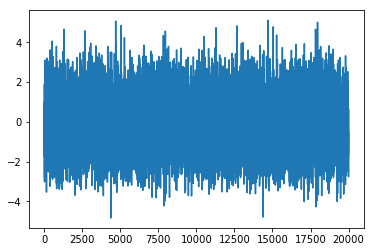

In [18]:
plt.plot(range(len(ma)), ma)

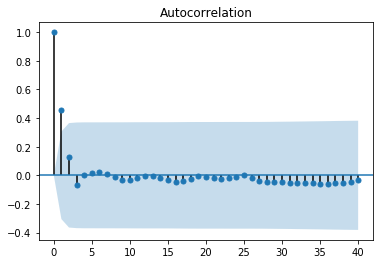

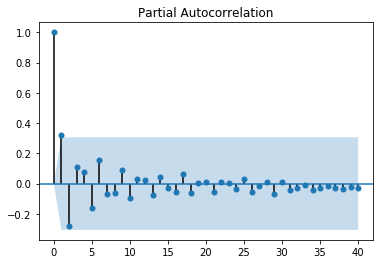

In [19]:
model = stt.acf(ma)
model_pacf = stt.pacf(ma)
# plt.scatter(range(len(model)), model)

tsap.plot_acf(model)
plt.show()
tsap.plot_pacf(model_pacf)
plt.show()

In [22]:
ar = [random_points[0], random_points[1], random_points[2]]

In [38]:
for i in range(3, len(random_points)):
    ar.append(ar[i] + 0.6 * ar[i - 1] + 0.4 * ar[i - 2] - 0.2 * ar[i - 3])

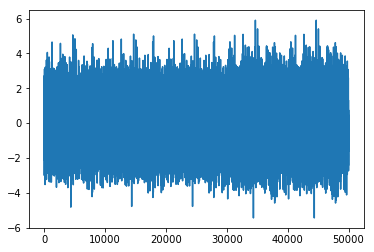

In [39]:
plt.plot(range(len(ma)), ma)

In [29]:
model2 = stt.acf(ar)
model2_pacf = stt.pacf(ar)

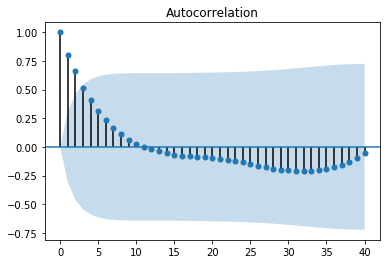

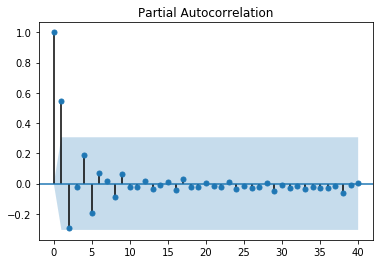

In [30]:
tsap.plot_acf(model2)
plt.show()
tsap.plot_pacf(model2_pacf)
plt.show()

In [48]:
arma = []
for i in range(2, len(ar)):
    arma.append(ar[i] - 0.75642885 * ar[i - 1] - 0.30009628 * ar[i - 2])
print(len(arma))

19995


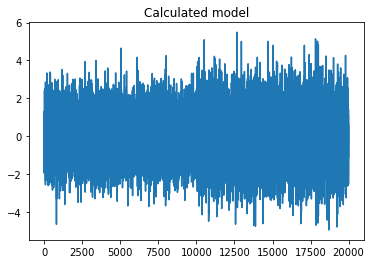

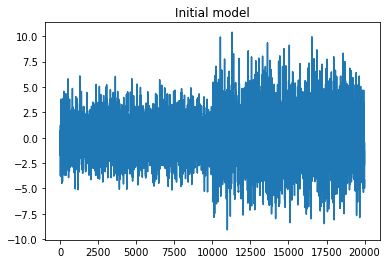

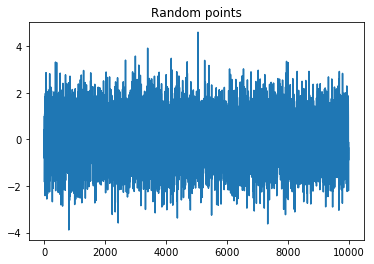

In [49]:
plt.plot(range(len(arma)), arma)
plt.title("Calculated model")
plt.show()
plt.plot(range(len(ar)), ar)
plt.title("Initial model")
plt.show()
plt.plot(range(len(random_points)), random_points)
plt.title("Random points")
plt.show()

In [50]:
random_points = np.random.normal(size = 20)
ra = [random_points[0], random_points[1]]

In [51]:
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

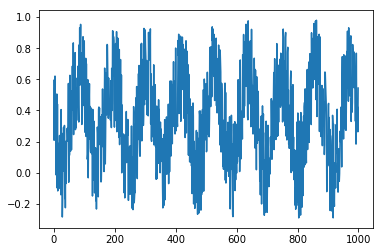

In [52]:
plt.plot(range(len(data)), data)

In [53]:
x = data[:-1]
y = data[1:]

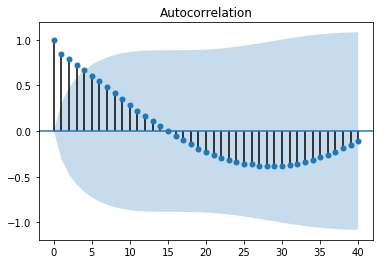

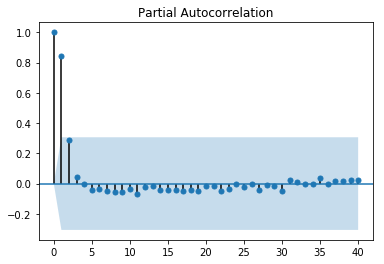

In [59]:
acf = stt.acf(data)
tsap.plot_acf(acf)
plt.show()
tsap.plot_pacf(acf)
plt.show()

In [60]:
arma = ARMA(np.array(data), order = (2, 4))

In [62]:
prediction = arma.predict(data)

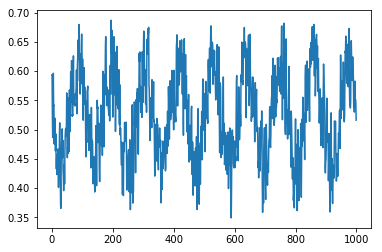

In [63]:
plt.plot(range(len(prediction)), prediction)

In [64]:
residual = data - prediction

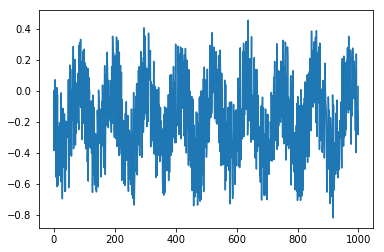

In [65]:
plt.plot(range(len(residual)), residual)

In [68]:
# arma2 = ARMA(np.array(residual), order = (1, 1))
# arma2.fit()
# residual2 = arma2.predict(residual)
# plt.plot(range(len(residual2)), residual2)

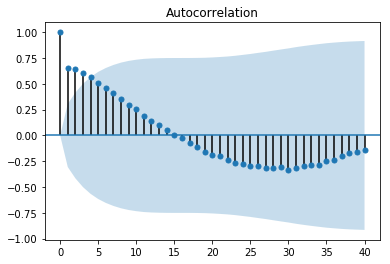

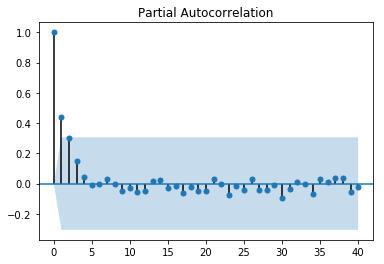

In [73]:
acf = stt.acf(residual)
tsap.plot_acf(acf)
plt.show()
pacf = stt.pacf(residual)
tsap.plot_pacf(pacf)
plt.show()

In [85]:
# api.tsa.seasonal_decompose(np.array(data), freq=int(0.25 * len(data))).plot()
# plt.show()